In [62]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd

api_key = "362d2ce77ac1347c707f15a319677c99"

In [80]:
print("How much are you willing to spend in one day per person")
min_amount=input("Min amount")
max_amount=input("Max amount")

How much are you willing to spend in one day per person
Min amount300
Max amount600


In [81]:
city_temp_cost = pd.read_csv("CSV_Data_Files/CityTravelCost.csv")
city=[]
state=[]
amount=[]
for index, row in city_temp_cost.iterrows():
    if((int(row[2]) >= int(min_amount)) and (int(row[2]) <= int(max_amount))):
        city.append(row[0])
        state.append(row[1])
        amount.append(row[2])

In [88]:
cost_df = pd.DataFrame({
    'City': city,
    'State': state,
    'Amount': amount
    },index=city)

if(len(cost_df) < 1):
    print("Please Broaden your search Criterea")


In [83]:
settings = {"units": "metric", "appid": api_key}

In [84]:
# Get data for each city in cities.csv
weather_data = []
summary = ["name", "main.temp"]
weather_df = pd.DataFrame()
for index,row in cost_df.iterrows():
    try:
        weather_data=ow.get_current(row[0], **settings)
        data = weather_data(*summary)
        weather_df=weather_df.append({'State/Cities': data[0], 'Current Temp': data[1]}, ignore_index=True)
    except:
        print("record not found " + row[0] )

In [85]:
weather_df

,Current Temp,State/Cities
0,27.93,Detroit
1,21.37,Park City
2,33.49,Palm Springs
3,25.50,Brooklyn
4,26.46,Jersey City
5,31.12,West Palm Beach


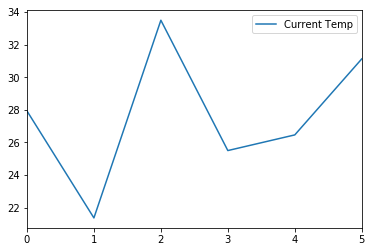

In [86]:
lines = weather_df.plot.line()